Chọn phương pháp: I (Inverse), G (Gamma), L (Log), H (Hist Eq), C (Contrast)


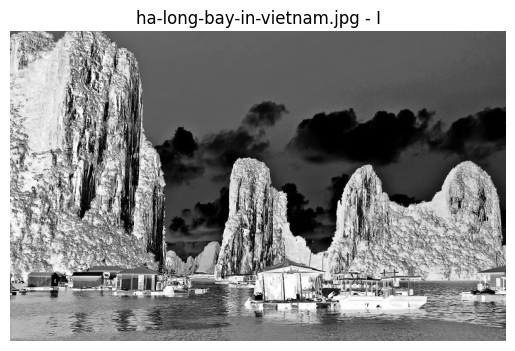

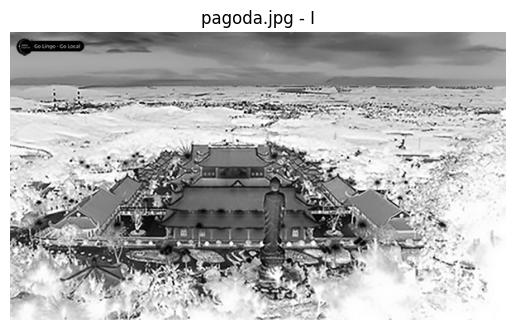

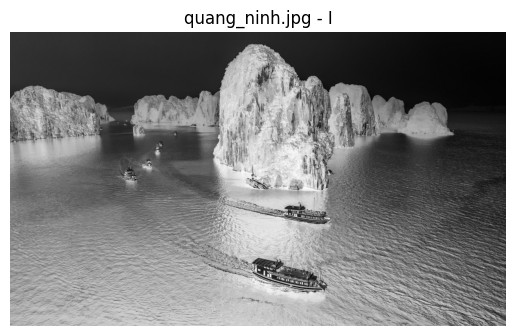

In [4]:
# Câu 1: Biến đổi ảnh theo menu I, G, L, H, C
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from PIL import Image
import math
import os

# Thư mục chứa ảnh
folder = "exercise"
output_folder = "output_cau1"
os.makedirs(output_folder, exist_ok=True)  # Tạo thư mục nếu chưa có

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    norm = img / 255.0
    corrected = np.power(norm, gamma)
    return (corrected * 255).astype(np.uint8)

def log_transform(img):
    c = 255 / math.log(1 + np.max(img))
    return (c * np.log(1 + img)).astype(np.uint8)

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    return img_equalized.reshape(img.shape).astype(np.uint8)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * 255 / (b - a)
    return stretched.astype(np.uint8)

menu = {
    'I': image_inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

def list_images(folder):
    images = []
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.png')):
            images.append(f"{folder}/{file}")
    return images

print("Chọn phương pháp: I (Inverse), G (Gamma), L (Log), H (Hist Eq), C (Contrast)")
choice = input("Nhập chữ tương ứng: ").upper()

if choice in menu:
    filenames = list_images(folder)
    for path in filenames:
        filename = path.split("/")[-1]
        img = Image.open(path).convert('L')
        img_np = np.array(img)
        transformed = menu[choice](img_np)

        plt.imshow(transformed, cmap='gray')
        plt.title(f"{filename} - {choice}")
        plt.axis('off')
        plt.show()

        out_path = f"{output_folder}/{filename.split('.')[0]}_{choice}.png"
        iio.imwrite(out_path, transformed)
else:
    print("Lựa chọn không hợp lệ!")
